### Credit Card Fraud Detection 
You can download the data from https://www.kaggle.com/mlg-ulb/creditcardfraud. 
##### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
##### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [141]:
import numpy as np
import pandas as pd
import sklearn
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Because of the privacy reason, we only know Time and Amount. The other 28 columns from V1 to V28 are already scaled.

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum().max(), df.isnull().values.any()

(0, False)

In [9]:
df.shape

(284807, 31)

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Exploratory Data Analysis

In [13]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Descriptive statstics for 'Time' independent feature

In [14]:
df.loc[:, 'Time'] = df['Time'] / 3600
duration_by_day = df['Time'].max() / 24


This shows that duration of all the transactions is 2 days. 

Text(0.5, 0, 'Hourly')

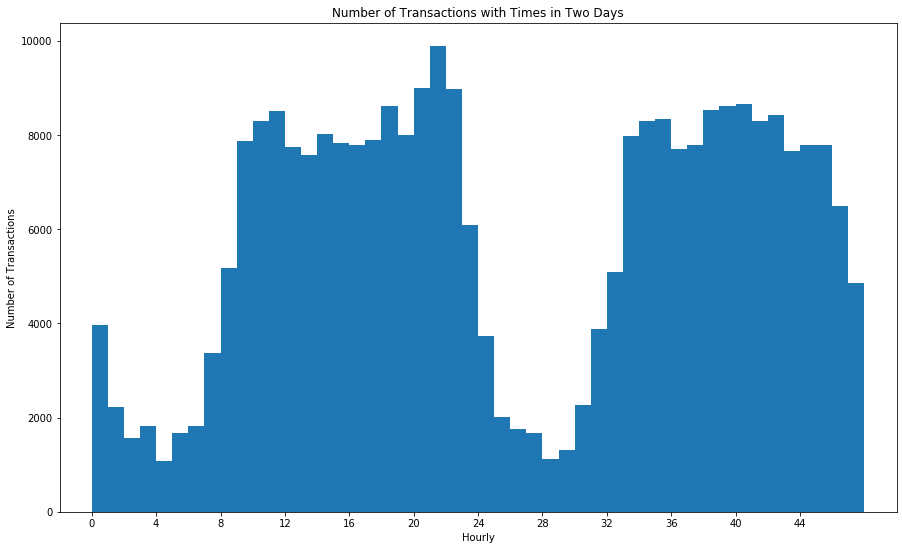

In [18]:
plt.figure(figsize=(15,9))
plt.hist(df['Time'], bins=48)
plt.xlim([-2,50])
plt.xticks(np.arange(0, 48, 4))
plt.title('Number of Transactions with Times in Two Days')
plt.ylabel('Number of Transactions')
plt.xlabel('Hourly')

Descriptive statstics for 'Amount' independent feature

In [19]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

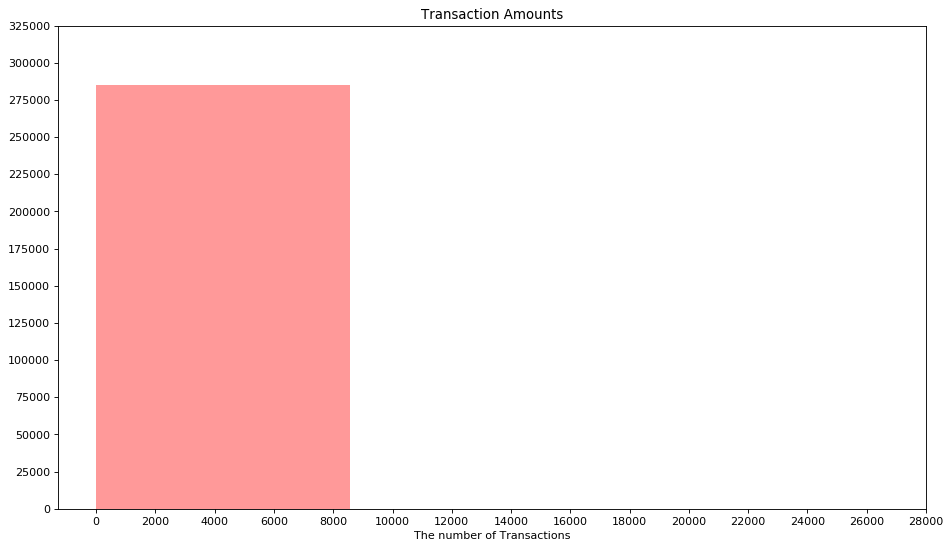

In [21]:
plt.figure(figsize=(14,8), dpi=80)
sns.distplot(df['Amount'], bins=3, kde=False, color='red')
plt.xticks(np.arange(0, 30000, 2000))
plt.yticks(np.arange(0, 350000, 25000))
plt.xlabel('The number of Transactions')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

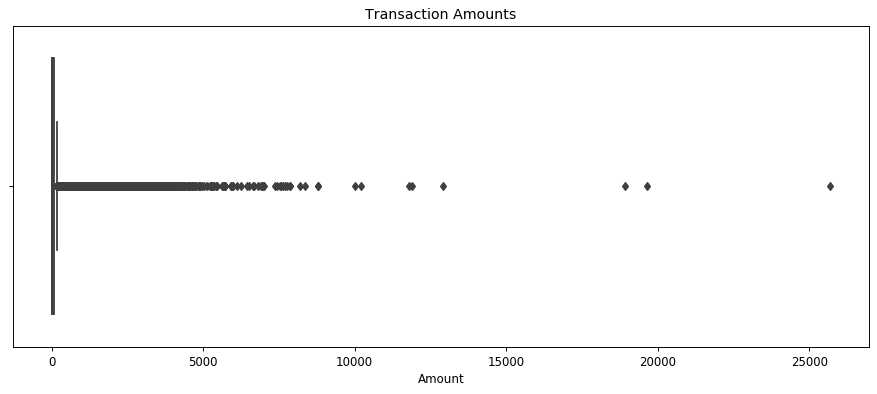

In [22]:
plt.figure(figsize=(13,5), dpi=85)
sns.boxplot(df['Amount'])
plt.title('Transaction Amounts')

I have used boxplot to see outliers more clearly. The amounts of the transactions seem right-skewed.

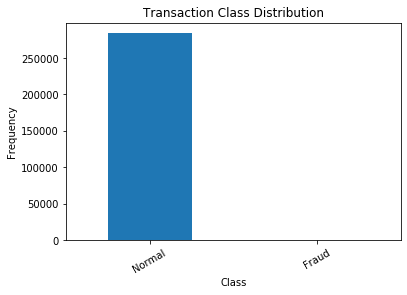

In [26]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=30)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [27]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [28]:
Fraud = df[df['Class']==1]

Normal = df[df['Class']==0]

In [29]:
Fraud.shape, Normal.shape

((492, 31), (284315, 31))

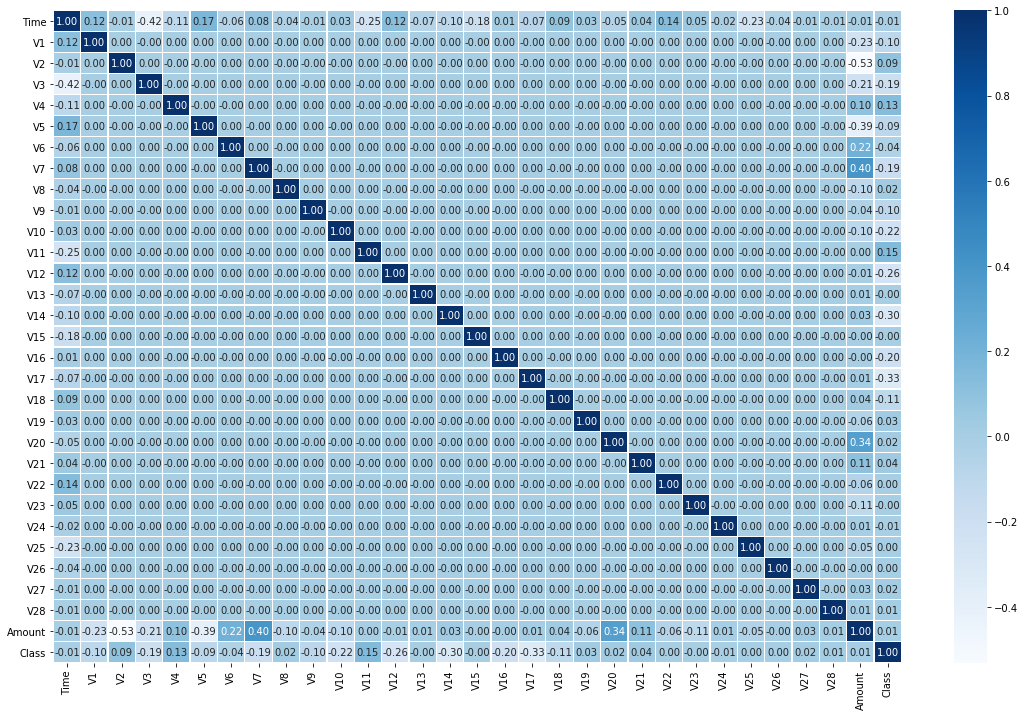

In [31]:
f,ax = plt.subplots(figsize=(19, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='Blues',
            xticklabels=df.columns, yticklabels=df.columns, cbar=True)
plt.savefig("Correlation.png")
plt.show()

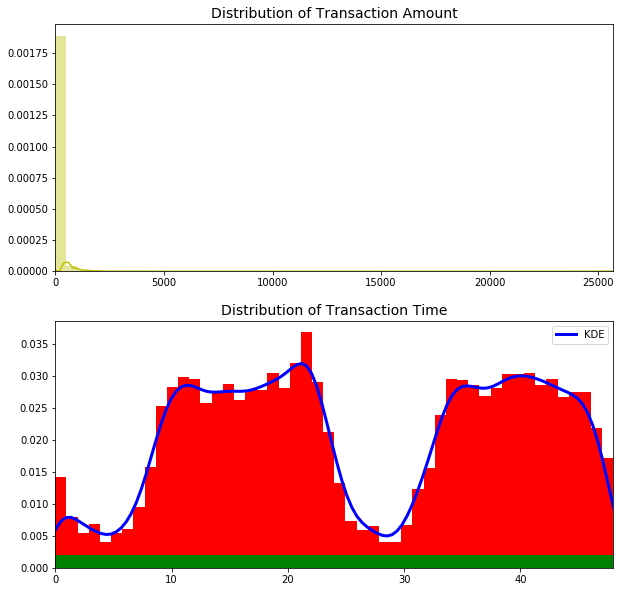

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

amount = df['Amount'].values
time = df['Time'].values

sns.distplot(amount, ax=ax[0], color='y')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='yellow',rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "b", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "stepfilled", "linewidth": 3,
                            "alpha": 1, "color": "r"})
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time), max(time)])

plt.savefig("dis")
plt.show()

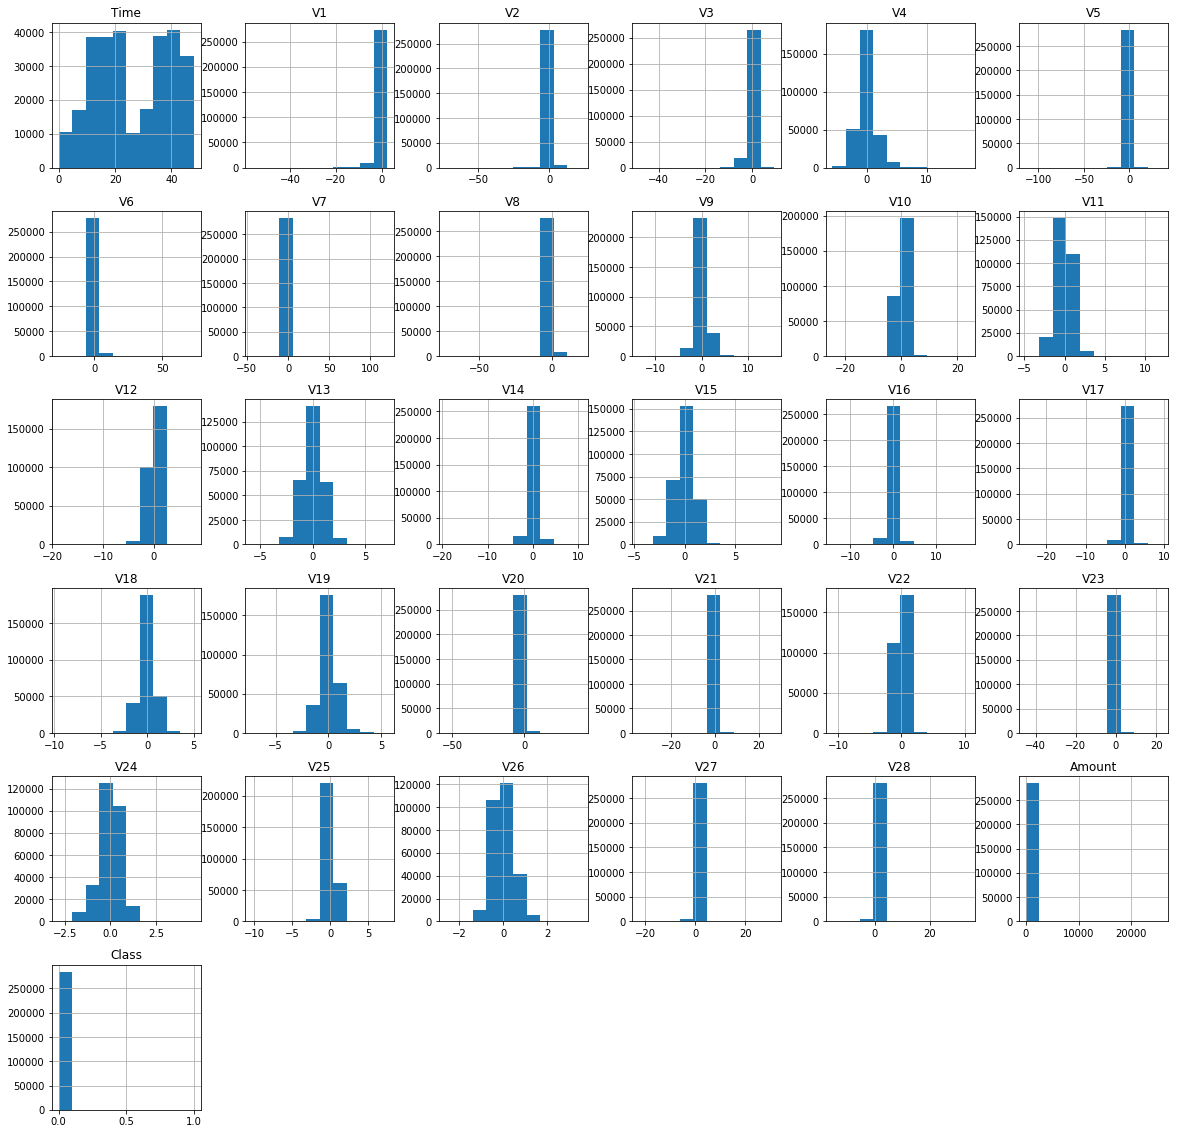

In [46]:
df.hist(figsize=(20,20))
plt.show()

In [47]:
outlier_fraction = len(Fraud)/float(len(Normal))
outlier_fraction*100

0.17304750013189596

This outlier fraction shows that we have a very imbalanced dataset. Our target (Fraud, Class==1) is only %17 of the dataset. The main concern here is that all ML models are designed to maximize the accuracy. Therefore, detecting all transaction as Normal will also give huge accuracy score, which is not helpful.  

### Scaling & Distributing

I chose the RobustScaler scaler which is less prone to outliers.

In [48]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

df['scaled_time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [49]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the data

In [50]:
X = df.drop(['Class'], axis=1)
y = df.Class.astype(np.float32)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
y_train.value_counts()

0.0    227454
1.0       391
Name: Class, dtype: int64

In [53]:
y.value_counts()

0.0    284315
1.0       492
Name: Class, dtype: int64

In [54]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

In [55]:
Fraud.shape, Normal.shape

((492, 31), (284315, 31))

#### Logistic Regression

In [56]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56861
         1.0       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



#### Random Forest Classifier

In [58]:
RF = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
RF_pred = RF.predict(X_test)

accuracy_score(y_test, RF_pred)

0.9994557775359011

In [59]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56861
         1.0       0.93      0.75      0.83       101

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



#### 1. Undersampling Majority Class

I will use sampling module from scikit-learn to remove some samples from the majority class 'Normal'. Undersampling can be a good method in case having a large dataset. One of the disadvantage here is loosing some information that might be valuable.

In [60]:
undersampled_data = Normal.sample(len(Fraud))
undersampled_data = pd.concat([undersampled_data, Fraud], axis=0)
print(undersampled_data.Class.value_counts())

1    492
0    492
Name: Class, dtype: int64


In [61]:
X_under = undersampled_data.drop('Class', axis=1)
y_under = undersampled_data['Class']

In [62]:
from sklearn.model_selection import train_test_split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, 
                                                                            random_state=0, stratify=y_under)

In [63]:
y_train_under.value_counts()

1    394
0    393
Name: Class, dtype: int64

I have used 'liblinear' as a solver in LogisticRegression because it is better for small datasets.

In [64]:
undersample_LR = LogisticRegression(solver='liblinear')
undersample_LR.fit(X_train_under, y_train_under)
undersample_pred = undersample_LR.predict(X_test_under)

In [65]:
accuracy_score(y_test_under, undersample_pred)

0.8984771573604061

In [66]:
f1_score(y_test_under, undersample_pred)

0.8936170212765957

In [67]:
recall_score(y_test_under, undersample_pred)

0.8571428571428571

In [68]:
pd.DataFrame(confusion_matrix(y_test_under, undersample_pred))

,0,1
0,93,6
1,14,84


In [69]:
print(classification_report(y_test_under, undersample_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        99
           1       0.93      0.86      0.89        98

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



##### 2. Oversampling Minority Class

Oversampling is basically used for adding some copies of minority class to have similar number of majority class samples.  I will again use sampling module from scikit-learn.

In [72]:
oversampled_data = Fraud.sample(len(Normal), replace = True)
oversampled_data = pd.concat([oversampled_data, Normal], axis=0)
print(oversampled_data.Class.value_counts())

1    284315
0    284315
Name: Class, dtype: int64


In [73]:
X_over = oversampled_data.drop('Class', axis=1)
y_over = oversampled_data['Class']

In [74]:
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=0, stratify=y_over)

In [75]:
y_train_over.value_counts()

1    227452
0    227452
Name: Class, dtype: int64

In [76]:
oversample_LR = LogisticRegression()
oversample_LR.fit(X_train_over, y_train_over)
oversample_pred = oversample_LR.predict(X_test_over)

In [77]:
accuracy_score(y_test_over, oversample_pred)

0.9508115998100698

In [78]:
pd.DataFrame(confusion_matrix(y_test_over, oversample_pred))

,0,1
0,55588,1275
1,4319,52544


In [79]:
print(classification_report(y_test_over, oversample_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.98      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



#### 3. SMOTE (Synthetic Minority Oversampling Technique)

In [80]:
#!pip install imbalanced-learn

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
y.value_counts()

0.0    284315
1.0       492
Name: Class, dtype: int64

In [83]:
smote = SMOTE(sampling_strategy='minority', random_state = 0)
X_smote, y_smote = smote.fit_sample(X,y)

y_smote.value_counts()

1.0    284315
0.0    284315
Name: Class, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, 
                                                                            random_state=0, stratify=y_smote)

Check if we have same number of samples for each classes after using stratify.

In [85]:
y_test_smote.value_counts()

1.0    56863
0.0    56863
Name: Class, dtype: int64

In [86]:
smote_LR = LogisticRegression()
smote_LR.fit(X_train_smote, y_train_smote)
smote_y_pred = smote_LR.predict(X_test_smote)

In [87]:
accuracy_score(y_test_smote, smote_y_pred)

0.9478395441675607

In [88]:
pd.DataFrame(confusion_matrix(y_test_smote, smote_y_pred))

,0,1
0,55483,1380
1,4552,52311


In [89]:
print(classification_report(y_test_smote, smote_y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     56863
         1.0       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



### Report

In [90]:
under_accuracy = accuracy_score(y_test_under, undersample_pred)
over_accuracy = accuracy_score(y_test_over, oversample_pred)
smote_accuracy = accuracy_score(y_test_smote, smote_y_pred)

under_f1_score = f1_score(y_test_under, undersample_pred)
over_f1_score = f1_score(y_test_over, oversample_pred)
smote_f1_score = f1_score(y_test_smote, smote_y_pred)

under_recall_score = recall_score(y_test_under, undersample_pred)
over_recall_score = recall_score(y_test_over, oversample_pred)
smote_recall_score = recall_score(y_test_smote, smote_y_pred)

list_accuracy = [under_accuracy, over_accuracy, smote_accuracy]
list_f1_score = [under_f1_score, over_f1_score, smote_f1_score]
list_recall = [under_recall_score, over_recall_score, smote_recall_score]
                 
dataframe = pd.DataFrame(list_accuracy, index=['under_sampling','over_sampling','SMOTE'])
dataframe.columns = ['Accuracy']
dataframe.insert(loc=1, column='F1-score', value=list_f1_score)
dataframe.insert(loc=2, column='Recall', value=list_recall)
dataframe.columns.name = 'Fraud Detection'
dataframe

Fraud Detection,Accuracy,F1-score,Recall
under_sampling,0.898477,0.893617,0.857143
over_sampling,0.950812,0.949459,0.924046
SMOTE,0.947840,0.946343,0.919948


Here, I have covered some methods and algorithms to deal with the imbalanced data. 
Of course, there are several different methods to collect data with different methods. Lets try to solve the problem using ANN.

### Apply ANN 

- First create an ANN and visualize it using ROC & AUC metrics.
- Then, use weights handling technique to make the data balanced.

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [128]:
X=df.iloc[:,1:30]
y=df.iloc[:,-1]

In [129]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [130]:
y_train.value_counts()

0    213233
1       372
Name: Class, dtype: int64

#### Weighted Neural Network using Keras

- Define weights & fit the data with these specific weights

In [132]:
weights_assigned={0:1,1:555}

In [133]:
n_inputs = len(X_train.columns)
n_inputs

29

In [137]:
model = keras.Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(15, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, class_weight=weights_assigned, epochs=15)

Epoch 1/15
6676/6676 [==============================] - 10s 2ms/step - loss: 0.6423 - accuracy: 0.9731
Epoch 2/15
6676/6676 [==============================] - 12s 2ms/step - loss: 0.2707 - accuracy: 0.9722
Epoch 3/15
6676/6676 [==============================] - 16s 2ms/step - loss: 0.2262 - accuracy: 0.9730
Epoch 4/15
6676/6676 [==============================] - 12s 2ms/step - loss: 0.1747 - accuracy: 0.9784
Epoch 5/15
6676/6676 [==============================] - 11s 2ms/step - loss: 0.2088 - accuracy: 0.9767
Epoch 6/15
6676/6676 [==============================] - 11s 2ms/step - loss: 0.1486 - accuracy: 0.9788
Epoch 7/15
6676/6676 [==============================] - 9s 1ms/step - loss: 0.1535 - accuracy: 0.9791
Epoch 8/15
6676/6676 [==============================] - 8s 1ms/step - loss: 0.1266 - accuracy: 0.9820
Epoch 9/15
6676/6676 [==============================] - 9s 1ms/step - loss: 0.1270 - accuracy: 0.9797: 0s -
Epoch 10/15
6676/6676 [==============================] - 8s 1ms/step -

In [138]:
print(model.evaluate(X_test, y_test))
    
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
    
print("Classification Report: \n", classification_report(y_test, y_preds))

2226/2226 [==============================] - 2s 814us/step - loss: 0.0451 - accuracy: 0.9881
[0.04509672522544861, 0.9881182909011841]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71082
           1       0.11      0.90      0.20       120

    accuracy                           0.99     71202
   macro avg       0.56      0.94      0.60     71202
weighted avg       1.00      0.99      0.99     71202



In [139]:
roc_auc_score(y_test,y_preds)

0.9441335359162658

### THE END